# Project 1 SSE 692

## Problem 3

For this problem, i'm having to train a program to decide whether a passanger aboard the titanic will survive or not based on several parameters. I'll start this problem off by importing the data. [2]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

Now that we have the data, I went ahead and looked into it to see what i was working with.

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Looking at this, i can see already see some columns ill take out because i dont think it will have much of an impact, such as Name, PassengerId, Parch, Ticket, Cabin, and SibSp. These just look unimportant or unnecessary to determining survival.

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data = train_data.drop(['Name', 'PassengerId', 'Parch', 'Ticket', 'Cabin', 'SibSp'], axis=1)
test_data = test_data.drop(['Name', 'PassengerId', 'Parch', 'Ticket', 'Cabin', 'SibSp'], axis=1)

In [7]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [8]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


Now im going to focus on spliting each category up that in a way that will help the program decide who will survive or not. Since Pclass and sex are pretty much already split up, ill start with Age. First, we will group the train_data and the test_data so we will be making changes to both sets. After this, Ill have to start by filling in the null values for age. Ill just fill them in as 35 so they can be around the median. After this, ill split the ages into 10 groups and make a new column call AgeGroups

In [9]:
for dataset in [train_data, test_data]:
    dataset['Age'] = dataset['Age'].fillna(35)
    dataset['Age'] = dataset['Age'].astype(int)   
    
train_data['AgeGroups'] = pd.cut(train_data['Age'], 10)
print (train_data[['AgeGroups', 'Survived']].groupby(['AgeGroups'], as_index=False).mean())  
train_data = train_data.drop(['AgeGroups'], axis=1)

      AgeGroups  Survived
0  (-0.08, 8.0]  0.666667
1   (8.0, 16.0]  0.413043
2  (16.0, 24.0]  0.353933
3  (24.0, 32.0]  0.388235
4  (32.0, 40.0]  0.349153
5  (40.0, 48.0]  0.352941
6  (48.0, 56.0]  0.466667
7  (56.0, 64.0]  0.375000
8  (64.0, 72.0]  0.000000
9  (72.0, 80.0]  0.500000


After this, we can map our Age group to the groups we just made. We can also drop AgeGroups from train_data.

In [10]:
traintest_data = [train_data, test_data]
for dataset in traintest_data:
    dataset.loc[ dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 72), 'Age'] = 5

In [11]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,2,7.2500,S
1,1,1,female,4,71.2833,C
2,1,3,female,3,7.9250,S
3,1,1,female,4,53.1000,S
4,0,3,male,4,8.0500,S


In [12]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,4,7.8292,Q
1,3,female,5,7.0000,S
2,2,male,3,9.6875,Q
3,3,male,3,8.6625,S
4,3,female,2,12.2875,S


Now that we have Age how we want it, im going to go ahead and change Sex and Embarked to numbers as well. From looking above at Embarked null info, we can see that it has 2 nan. We will just go ahead and replace this with S and move on.

In [13]:
for dataset in traintest_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [14]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,2,7.2500,0
1,1,1,0,4,71.2833,1
2,1,3,0,3,7.9250,0
3,1,1,0,4,53.1000,0
4,0,3,1,4,8.0500,0


In [15]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,4,7.8292,2
1,3,0,5,7.0000,0
2,2,1,3,9.6875,2
3,3,1,3,8.6625,0
4,3,0,2,12.2875,0


For some reason, this didnt change the Sex and Embarked for train_data, so i will just go ahead and change that.

Now that we have that, all we have left to do is treat Fare similar to how we treated Age. We are going to split it up into groups to be able to better detemine survivability. First we need to get rid of the nan values. Ill set them to 20 because thats around the middle. Since there is a huge outlier around 500, we will use qcut instead of just a regular cut.

In [16]:
for dataset in traintest_data:
    dataset['Fare'] = dataset['Fare'].fillna(20)

train_data['FareGroups'] = pd.qcut(train_data['Fare'], 6)

print (train_data[['FareGroups', 'Survived']].groupby(['FareGroups'], as_index=False).mean()) 

          FareGroups  Survived
0    (-0.001, 7.775]  0.205128
1     (7.775, 8.662]  0.190789
2    (8.662, 14.454]  0.366906
3     (14.454, 26.0]  0.436242
4     (26.0, 52.369]  0.417808
5  (52.369, 512.329]  0.697987


Now that we have this data, we can go ahead and split up the Fare group accordingly. We can also delete the FareGroups.

In [17]:
for dataset in traintest_data:
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26.0), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 52.369), 'Fare'] = 5
    
train_data = train_data.drop(['FareGroups'], axis=1)

In [18]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,2,0.0,0
1,1,1,0,4,5.0,1
2,1,3,0,3,1.0,0
3,1,1,0,4,5.0,0
4,0,3,1,4,1.0,0


In [19]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,4,1.0,2
1,3,0,5,0.0,0
2,2,1,3,2.0,2
3,3,1,3,2.0,0
4,3,0,2,2.0,0


It looks like it didnt change it for train_data this time either, so i will just manually do it for that as well.

In [20]:
x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [21]:
x_test = test_data.copy()

In [22]:
x_train.shape, y_train.shape, x_test.shape

((891, 5), (891,), (418, 5))

In [23]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null int32
Fare        418 non-null float64
Embarked    418 non-null int32
dtypes: float64(1), int32(3), int64(1)
memory usage: 11.5 KB


I got an error while trying to run test set, so i ran an info() on it to see whats going on and i noticed theres a null value in fare. Im going to write a little line of code to take care of that. Im going to set it to 4.0 because its around the average it seems

In [24]:
x_testlist = [x_test]
for dataset in x_testlist:
    dataset['Fare'] = dataset['Fare'].fillna(4.0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [25]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null int32
Fare        418 non-null int32
Embarked    418 non-null int32
dtypes: int32(4), int64(1)
memory usage: 9.9 KB


Now that we have the data to train and the data to test, we can start training the program and seeing how accurate it is. Im gonna do KNeighborsClassifier first.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train)
accuracy = round(clf.score(x_train, y_train) * 100, 2)
print (accuracy)

83.95


It got an accuracy of 83.95 which isnt bad, but im going to try DecisionTreeClassifier and see how that is.

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
accuracy = round(clf.score(x_train, y_train) * 100, 2)
print (accuracy)

86.08


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=5)
print(scores * 100)
print(scores.mean()*100)

[81.00558659 74.8603352  82.02247191 79.7752809  80.79096045]
79.69092700973513


In [34]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors = 3), x_train, y_train, cv=5)
print(scores * 100)
print(scores.mean()*100)

[79.32960894 72.62569832 76.96629213 76.96629213 80.2259887 ]
77.22277604655955


Comparing these 2, Decision Tree was a little bit better than K Neighbors with an accuracy of 86.08.

## Conclusion

Doing these problems gave me an enormous understanding of how machine learning works and helped learn some tricks in python. This was a really good learning experience. I really enjoyed having problems given to me so i didnt have to think of a project to do. I feel like thats what i spend most of my time doing is figuring out what project i want to do. But i really enjoyed this and it taught me a lot.

## References
It wont let me indent it for some reason.

[1] Géron Aurélien, *Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems.* Sebastopol, CA: OReilly Media, 2017.

[2] *RSNA Pneumonia Detection Challenge | Kaggle.* [Online]. Available: https://www.kaggle.com/c/titanic/rules#. [Accessed: 11-Feb-2019].

## Indirect Activity



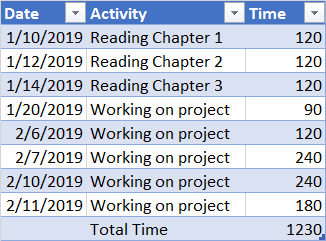